### <span style="color:black">Import the Libraries</span>

In [ ]:
pip install scikit-plot

In [ ]:
pip install matplotlib

In [ ]:
!pip install -q streamlit

In [ ]:
!pip install colabcode

In [ ]:
!pip install fastapi

In [ ]:
!pip install uvicorn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt

# imblearn Libraries
from imblearn.over_sampling import SMOTE
from imblearn import __version__ as imbv

# scipy Libraries
from scipy.stats import norm
from scipy import __version__ as scipv

# matplotlib Libraries
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv

# plotly Libraries
import plotly.express as explt
from plotly import __version__ as pvm



# sklearn Libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import __version__ as skv
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


ImportError: DLL load failed while importing _path: The specified module could not be found.

### <span style="color:black">Loading Data</span>

In [ ]:
creditcarddata = pd.read_csv("/content/FirstBankCreditCardCustomersChurners.csv")

### <span style="color:black">Data Summary</span>

In [ ]:
creditcarddata.shape

(10127, 21)

In [ ]:
creditcarddata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
creditcarddata.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
creditcarddata.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
creditcarddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are a total of 21 columns and 10,127 observations in the dataset
- We can see that Education_Level and Marital_Status have less than 10,127 non-null values i.e. columns have missing values.

### <span style="color:black">Duplicates</span>

In [ ]:
#Let's check for duplicate values in the data
creditcarddata.duplicated().sum()

0

### <span style="color:black">Missing data</span>

In [ ]:
print(creditcarddata.isna().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64



In our dataset, we will replace null values in the 'Education_Level' and 'Marital_Status' columns with the string 'unknown' since these represent incomplete customer details captured during the onboarding process.

### <span style="color:black">Treating missing values</span>

Note:   The missing value treatment should be done after splitting the data into Train, Validation and Test sets. However, in this case, the treatment is generic, since we are filling in the data with Unknown. Thus, the treatment can be done on the overall dataset. Similar strategy is applicable for treating the Income Category column value abc

In [ ]:
creditcarddata.fillna('Unknown', inplace=True)

In [ ]:
creditcarddata['Income_Category'].replace('abc', 'Unknown', inplace=True)

### <span style="color:black">Unique values for Category columns</span>

In [ ]:
creditcarddata.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64

### <span style="color:black">Unique values for Numerical columns</span>

In [ ]:
creditcarddata.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- Age has only 45 unique values i.e. most of the customers are of similar age

### <span style="color:black">Numerical column statistics</span>

In [ ]:
# let's view the statistical summary of the numerical columns in the data
creditcarddata.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


- Mean value for the Customer Age column is approx 46 and the median is also 46. This shows that majority of the customers are under 46 years of age.
- Dependent Count column has mean and median of ~2
- Months on Book column has mean and median of 36 months. Minimum value is 13 months, showing that the dataset captures data for customers with the bank at least 1 whole years
- Total Relationship Count has mean and median of ~4
- Credit Limit has a wide range of 1.4K to 34.5K, the median being 4.5K, way less than the mean 8.6K
- Total Transaction Count has mean of ~65 and median of 67

## <span style="color:black">Proportion of Categorical Variables</span>

### <span style="color:black">Proportion of Customer Genders</span>

In [3]:
explt.pie(creditcarddata, names='Gender', title='Proportion of Customer Genders')

NameError: name 'explt' is not defined

"While there is a slightly higher number of female customers than male customers, the difference is negligible, and it is unlikely to have a significant impact on the overall data analysis. For all intents and purposes, we can consider the genders to be uniformly distributed."

### <span style="color:black">Proportion of Education Levels</span>

In [ ]:
# Create a pie chart with centralized title
fig = explt.pie(creditcarddata, names='Education_Level')
fig.update_layout(title='Proportion of Education Levels', title_x=0.5, title_font=dict(size=20))  # Set title_x to 0.5 for centering the title

# Show the plot
fig.show()

We can see that the largest amount of customers have at least a graduate level education, with the second highest being high school level.

### <span style="color:black">Proportion of Different Marital Status</span>

In [ ]:
explt.pie(creditcarddata, names='Marital_Status', title='Proportion of Marital Status')

From the graph above, we can see that the majority of customers are either married or single

### <span style="color:black">Proportion of Different Income Levels</span>

In [ ]:
income = explt.pie(creditcarddata, names='Income_Category', title='Proportion of Different Income Levels')

newNames = {'$40K - $60K': '$40K - 60K', '$60K - $80K': '$60K - 80K', '$80K - $120K': '$80K - 120K'}

for item in newNames:
    for i, elem in enumerate(income.data[0].labels):
        if elem == item:
            income.data[0].labels[i] = newNames[item]
income

From the graph above, we can see that the majority of customers earn less than $40k a year.

### <span style="color:black">Proportion of Different Card Categories</span>

In [ ]:
explt.pie(creditcarddata, names='Card_Category', title='Proportion of Different Card Categories')

From the graph above, we can see that an overwhelming majority of customers use the banks "Blue" card

### <span style="color:black">Proportion of Attrited vs Existing Customers</span>


In [ ]:
explt.pie(creditcarddata, names='Attrition_Flag', title='Proportion of Attrited vs Existing Customers')

Since the majority of the customer data we have is of existing customers, i will be using SMOTE to upsample the attrited samples to match them with the regular customer sample size to balance out the skewed data and thus, also helping to improve the performance of the later selected models.

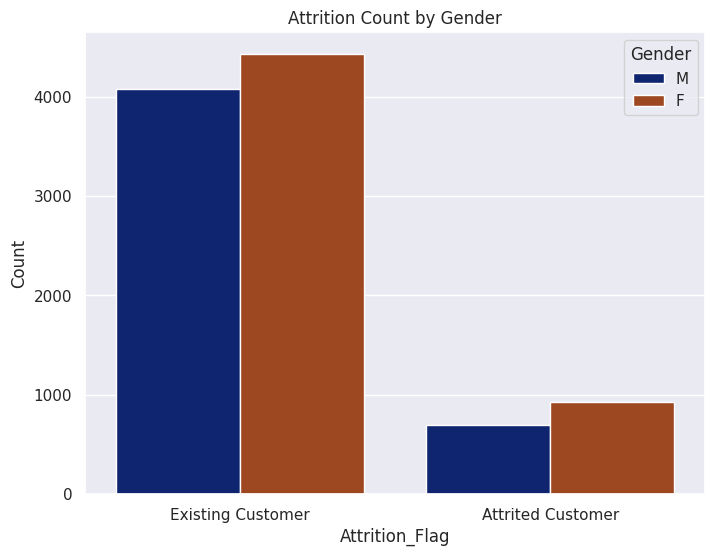

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Attrition_Flag', hue='Gender', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition Count by Gender')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')

# Show legend
plt.legend(title='Gender', loc='upper right')

# Display the chart
plt.show()

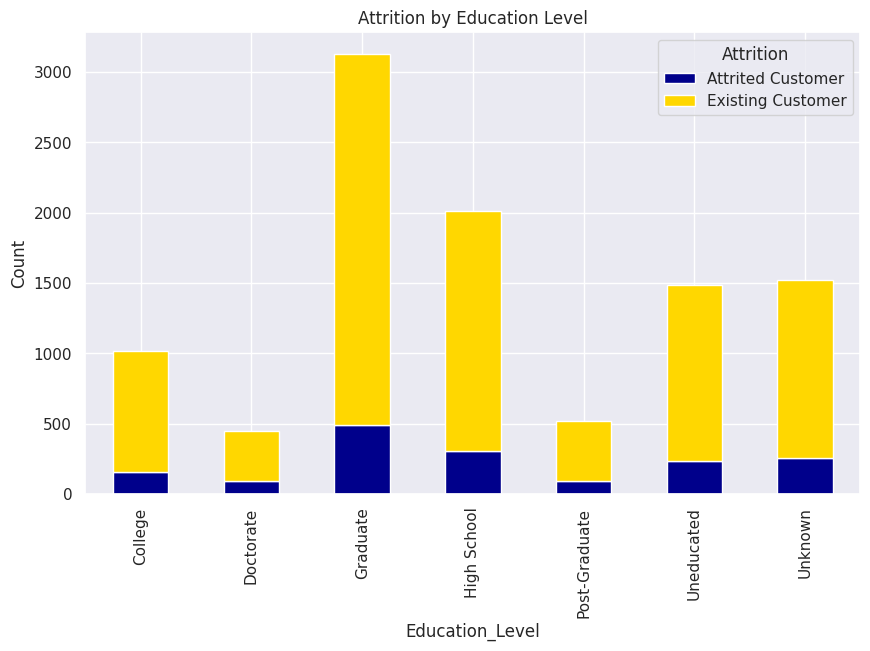

In [ ]:
 # Count occurrences of Attrition for each Education_Level
counts = creditcarddata.groupby(['Education_Level', 'Attrition_Flag']).size().unstack(fill_value=0)

# Create a clustered bar chart with Matplotlib
counts.plot(kind='bar', stacked=True, color=['darkblue', 'gold'], figsize=(10, 6))

# Customize the chart
plt.title('Attrition by Education Level')
plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Show the chart
plt.show()

<Figure size 1000x600 with 0 Axes>

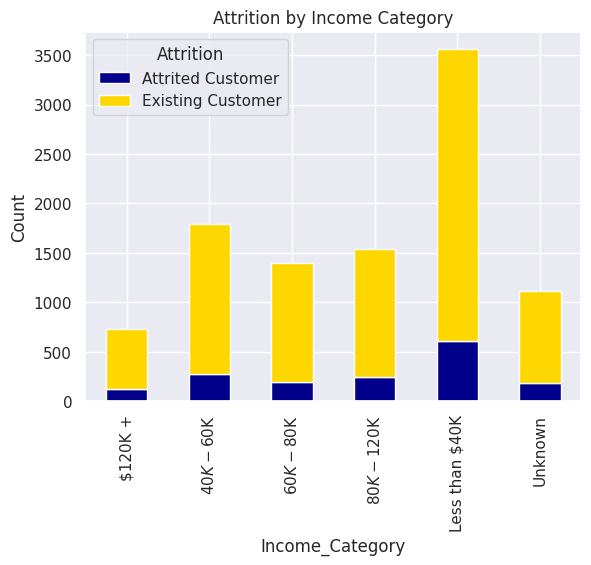

In [ ]:
# Count occurrences of Attrition_Flag for each Income_Category
counts = creditcarddata.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name='Count')
# Count occurrences of Attrition for each Education_Level
counts = creditcarddata.groupby(['Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

# Set a larger figure size
plt.figure(figsize=(10, 6))


# Create a clustered bar chart with Matplotlib
counts.plot(kind='bar', stacked=True, color=['darkblue', 'gold'])


# Customize the chart
plt.title('Attrition by Income Category')
plt.xlabel('Income_Category')
plt.ylabel('Count')
plt.legend(title='Attrition')

# Show the chart
plt.show()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


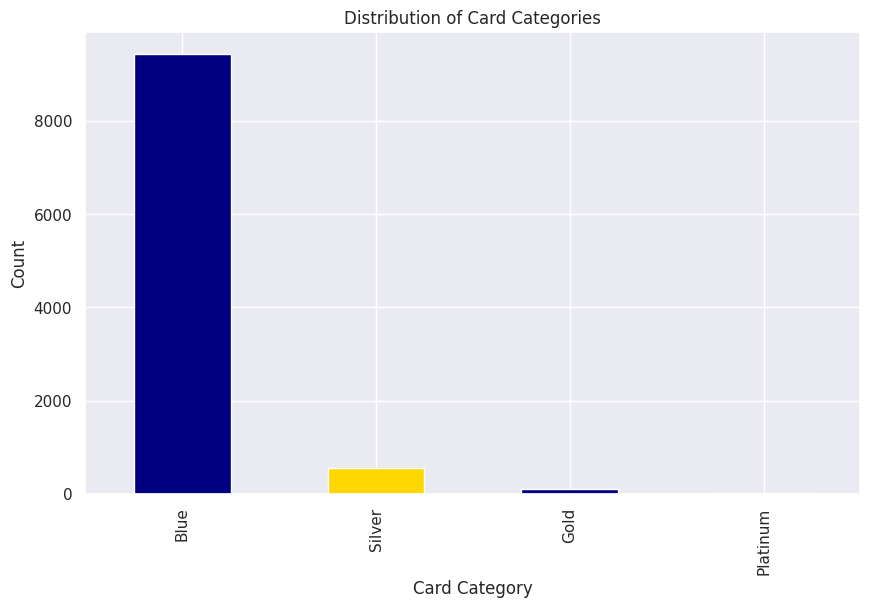

In [ ]:
# Prepare data
Card_Category_counts = creditcarddata['Card_Category'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
Card_Category_counts.plot(kind='bar', color=['#000080', 'gold'])

# Title and labels
plt.title('Distribution of Card Categories')
plt.xlabel('Card Category')
plt.ylabel('Count')

# Print the value counts
print(Card_Category_counts)

# Display the chart
plt.show()

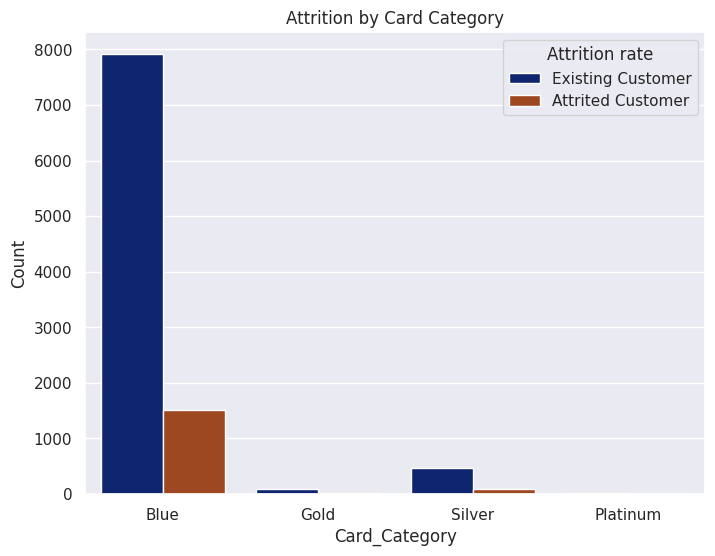

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition by Card Category')
plt.xlabel('Card_Category')
plt.ylabel('Count')

# Show legend
plt.legend(title='Attrition rate', loc='upper right')

# Display the chart
plt.show()

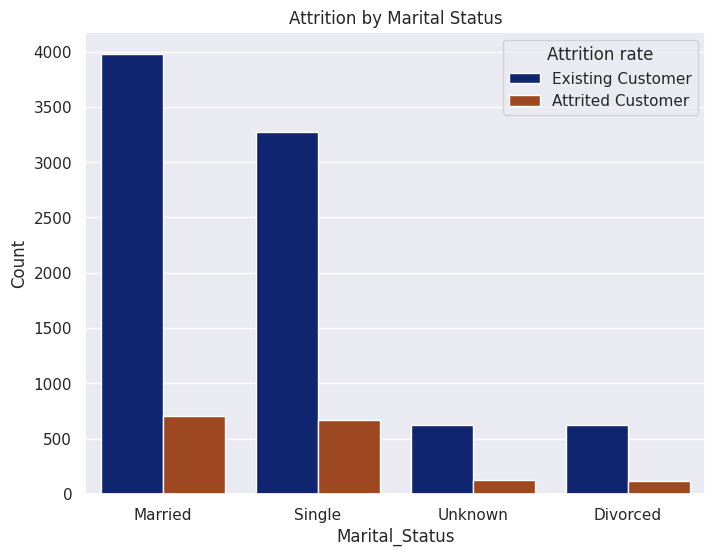

In [ ]:
# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Use seaborn for better styling (optional)
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data=creditcarddata, palette='dark')

# Customize the chart
plt.title('Attrition by Marital Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')

# Show legend
plt.legend(title='Attrition rate', loc='upper right')

# Display the chart
plt.show()

### <span style="color:black">Numerical Column:
    Customer Age
    Dependent Count
    Months on Book
    Total Relationship Count
    Months Inactive (12 Months)
    Credit Limit
    Total Transaction Amount
    Average Utilization Ratio

array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>],
       [<Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >]],
      dtype=object)

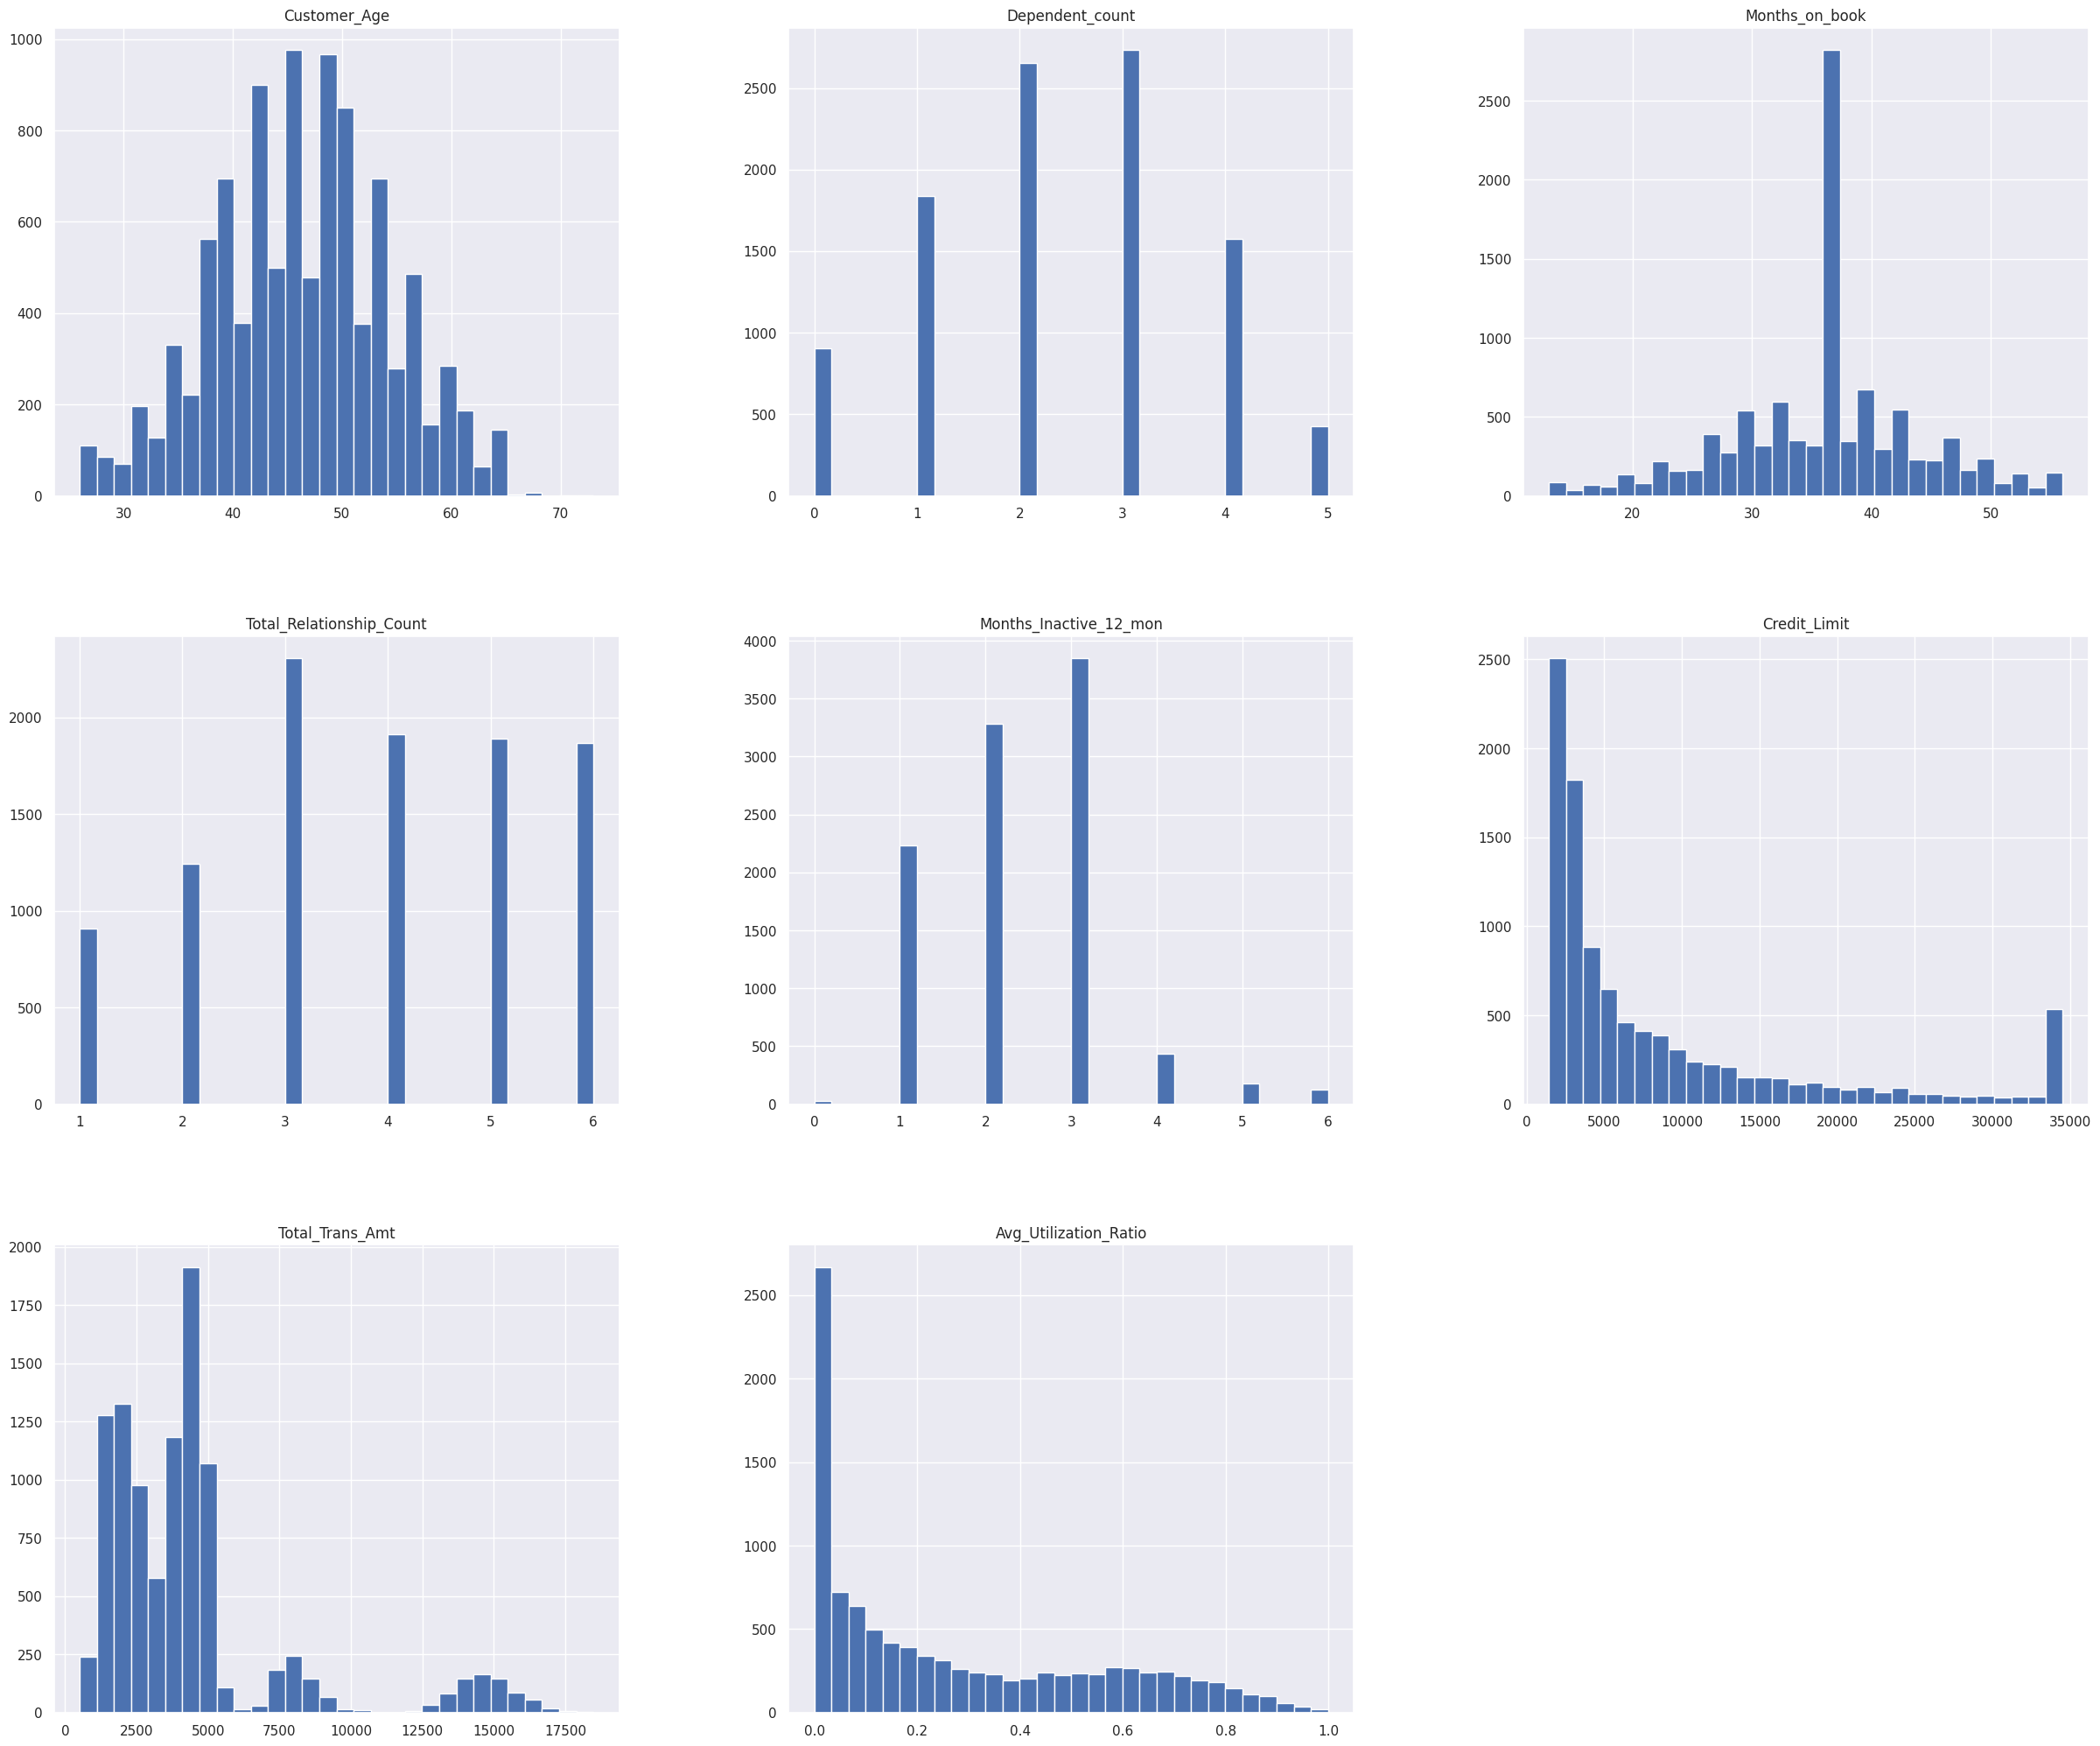

In [ ]:
hists = creditcarddata[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]
hists.hist(bins = 30, figsize = (30,25))#, color = 'lightgrey')

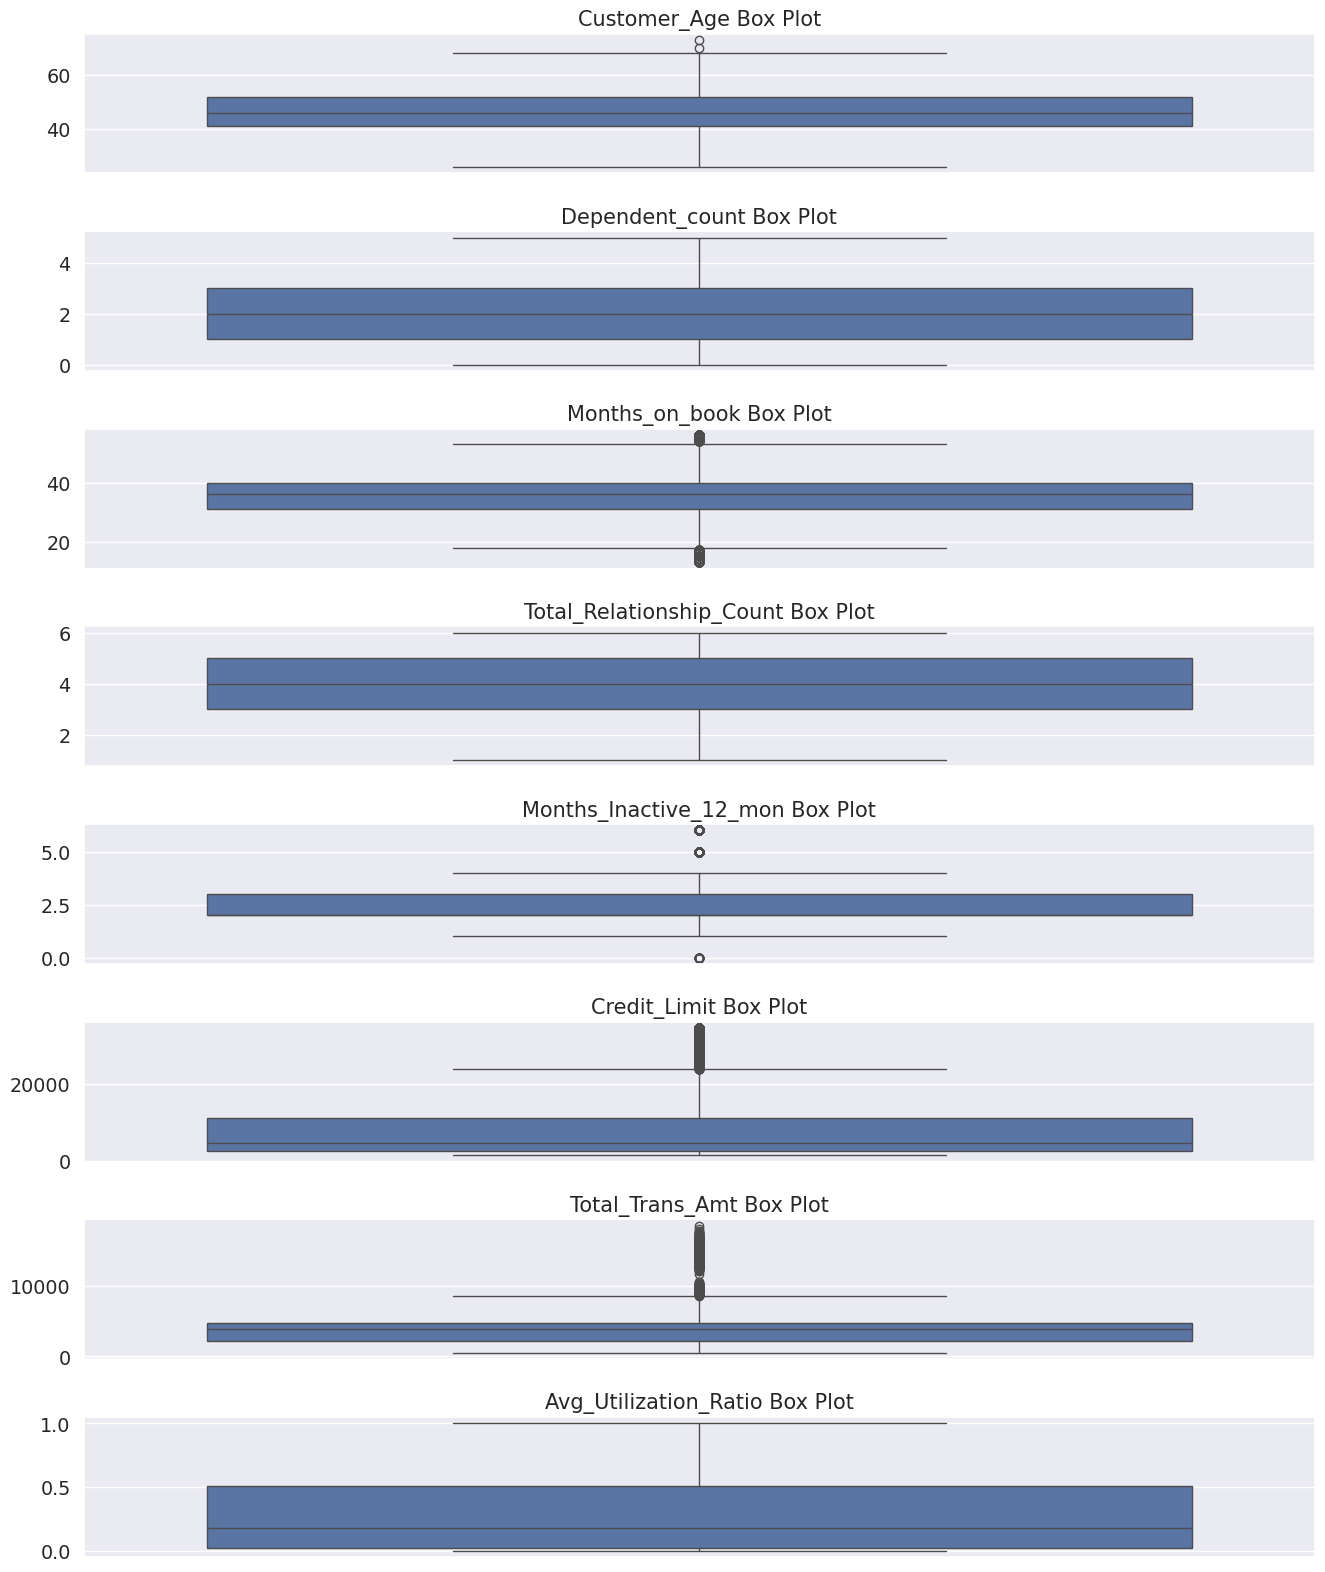

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.set_size_inches(13.5, 16)
sns.set(font_scale = 1.25)

boxs = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

i = 1
for var in boxs:
    fig.add_subplot(8, 1, i)
    sns.boxplot(pd.Series(creditcarddata[var], name='')).set_title(var + " Box Plot")
    i += 1

fig.tight_layout()

## <span style="color:black">Data Preprocessing and Feature Reduction</span>


### <span style="color:black">Step 1: Encode Categorical Variables, Remove Missing Data and Drop Unneeded Columns</span>

In [ ]:
creditcarddata['Attrition_Flag'] = creditcarddata['Attrition_Flag'].replace({'Attrited Customer':1, 'Existing Customer':0})
creditcarddata['Gender'] = creditcarddata['Gender'].replace({'F':1, 'M':0})

creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Education_Level']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Income_Category']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Marital_Status']).drop(columns=['Unknown'])], axis=1)
creditcarddata = pd.concat([creditcarddata, pd.get_dummies(creditcarddata['Card_Category']).drop(columns=['Platinum'])], axis=1)

 ### <span style="color:black">Drop Unneeded Columns from Dataset</span>

In [ ]:
creditcarddata.drop(columns = ['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'CLIENTNUM'], inplace=True)

In [ ]:
creditcarddata.shape

(10127, 33)

### <span style="color:black">New Dataset Dimensions</span>

In [ ]:
creditcarddata

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,40,3,2,3,4003.0,1851,...,1,0,0,0,0,0,1,1,0,0
10123,1,41,0,2,25,4,2,3,4277.0,2186,...,1,0,0,0,1,0,0,1,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,...,0,0,0,1,0,1,0,1,0,0
10125,1,30,0,2,36,4,3,3,5281.0,0,...,1,0,0,0,0,0,0,1,0,0


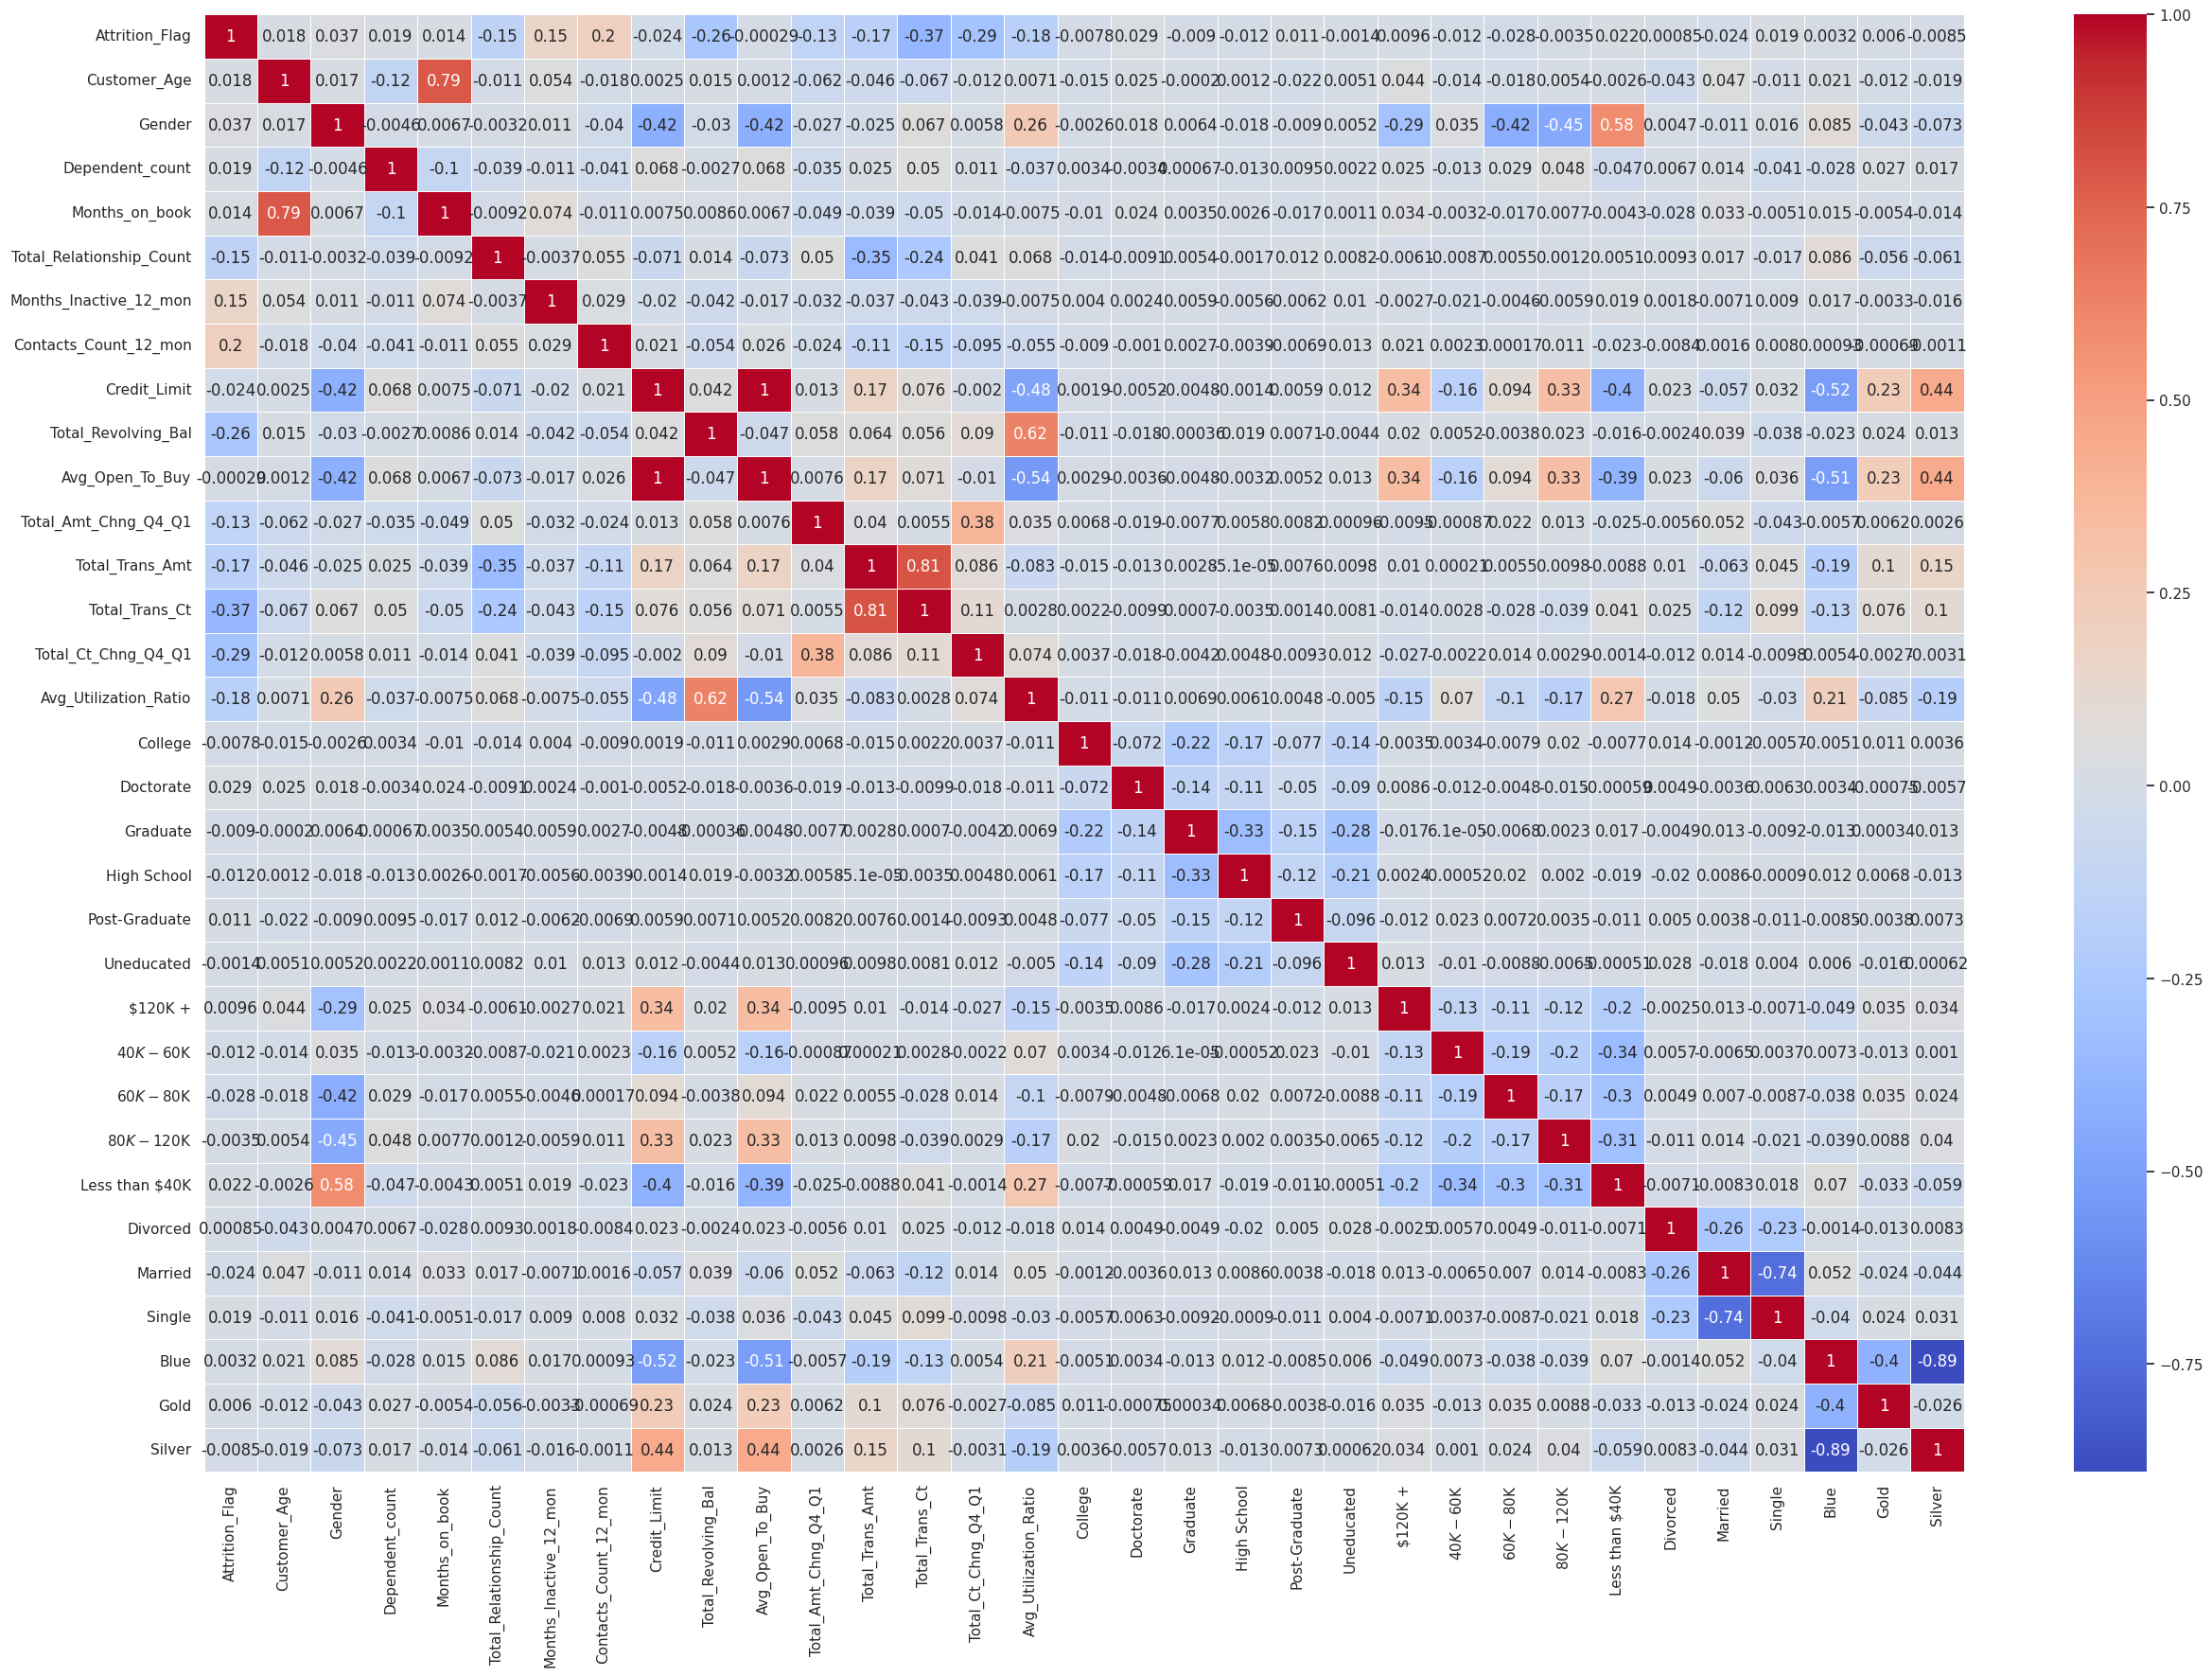

In [ ]:

fig = plt.figure()
fig.set_size_inches(30, 20)
sns.set(font_scale=1)

sns.heatmap(creditcarddata.corr('pearson'), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

From the above correlation matrix, we can see that there are now quite a few variables and using all of them for modeling could pose to be a problem. We will up-sample the data to even out the skewedness of the attrited customers.

### <span style="color:black">Step 2: Up-sample the Dataset Using SMOTE</span>

In [ ]:
smote_sample = SMOTE()

X, y = smote_sample.fit_resample(creditcarddata[creditcarddata.columns[1:]], creditcarddata[creditcarddata.columns[0]])

up_sampData = X.assign(Attrition = y)

In [ ]:
up_sampData

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Attrition
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,1,0,0,0,1,0,1,0,0,0
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,0,0,1,0,0,1,1,0,0,0
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,0,1,0,0,1,0,1,0,0,0
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,0,0,1,0,0,0,1,0,0,0
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,52,1,3,43,1,3,3,2352.085085,1312,1040.068297,...,0,0,1,0,0,0,1,0,0,1
16996,33,1,0,21,5,1,5,3971.987568,365,3606.909207,...,0,0,0,0,0,1,1,0,0,1
16997,54,1,2,46,2,2,2,3504.651320,237,3266.743337,...,0,0,1,0,0,1,1,0,0,1
16998,42,0,2,31,1,3,3,3041.513806,0,3041.513806,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
up_sampData

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Attrition
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,1,0,0,0,1,0,1,0,0,0
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,0,0,1,0,0,1,1,0,0,0
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,0,1,0,0,1,0,1,0,0,0
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,0,0,1,0,0,0,1,0,0,0
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,52,1,3,43,1,3,3,2352.085085,1312,1040.068297,...,0,0,1,0,0,0,1,0,0,1
16996,33,1,0,21,5,1,5,3971.987568,365,3606.909207,...,0,0,0,0,0,1,1,0,0,1
16997,54,1,2,46,2,2,2,3504.651320,237,3266.743337,...,0,0,1,0,0,1,1,0,0,1
16998,42,0,2,31,1,3,3,3041.513806,0,3041.513806,...,0,0,0,0,1,0,1,0,0,1


In [ ]:
X

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,45,0,3,39,5,1,3,12691.000000,777,11914.000000,...,0,1,0,0,0,1,0,1,0,0
1,49,1,5,44,6,1,2,8256.000000,864,7392.000000,...,0,0,0,1,0,0,1,1,0,0
2,51,0,3,36,4,1,0,3418.000000,0,3418.000000,...,0,0,1,0,0,1,0,1,0,0
3,40,1,4,34,3,4,1,3313.000000,2517,796.000000,...,0,0,0,1,0,0,0,1,0,0
4,40,0,3,21,5,1,0,4716.000000,0,4716.000000,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,52,1,3,43,1,3,3,2352.085085,1312,1040.068297,...,0,0,0,1,0,0,0,1,0,0
16996,33,1,0,21,5,1,5,3971.987568,365,3606.909207,...,0,0,0,0,0,0,1,1,0,0
16997,54,1,2,46,2,2,2,3504.651320,237,3266.743337,...,0,0,0,1,0,0,1,1,0,0
16998,42,0,2,31,1,3,3,3041.513806,0,3041.513806,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
16995    1
16996    1
16997    1
16998    1
16999    1
Name: Attrition_Flag, Length: 17000, dtype: int64

In [ ]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,-0.173018,-0.949284,0.648145,0.429111,1.027400,-1.483370,0.461352,0.469041,-0.199195,0.487900,...,-0.366802,3.206352,-0.349340,-0.635634,-0.221346,1.336744,-0.655662,0.299922,-0.08537,-0.199865
1,0.369909,1.053425,2.298603,1.105428,1.686387,-1.483370,-0.513901,-0.017750,-0.101298,-0.007851,...,-0.366802,-0.311881,-0.349340,1.573233,-0.221346,-0.748086,1.525175,0.299922,-0.08537,-0.199865
2,0.641373,-0.949284,0.648145,0.023321,0.368413,-1.483370,-2.464409,-0.548775,-1.073524,-0.443524,...,-0.366802,-0.311881,2.862544,-0.635634,-0.221346,1.336744,-0.655662,0.299922,-0.08537,-0.199865
3,-0.851677,1.053425,1.473374,-0.247206,-0.290575,1.797283,-1.489155,-0.560300,1.758760,-0.730975,...,-0.366802,-0.311881,-0.349340,1.573233,-0.221346,-0.748086,-0.655662,0.299922,-0.08537,-0.199865
4,-0.851677,-0.949284,0.648145,-2.005630,1.027400,-1.483370,-2.464409,-0.406305,-1.073524,-0.301223,...,-0.366802,3.206352,-0.349340,-0.635634,-0.221346,1.336744,-0.655662,0.299922,-0.08537,-0.199865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0.777105,1.053425,0.648145,0.970165,-1.608549,0.703732,0.461352,-0.665771,0.402820,-0.704218,...,-0.366802,-0.311881,-0.349340,1.573233,-0.221346,-0.748086,-0.655662,0.299922,-0.08537,-0.199865
16996,-1.801800,1.053425,-1.827542,-2.005630,1.027400,-1.483370,2.411860,-0.487969,-0.662803,-0.422813,...,-0.366802,-0.311881,-0.349340,-0.635634,-0.221346,-0.748086,1.525175,0.299922,-0.08537,-0.199865
16997,1.048568,1.053425,-0.177084,1.375955,-0.949562,-0.389819,-0.513901,-0.539264,-0.806837,-0.460106,...,-0.366802,-0.311881,-0.349340,1.573233,-0.221346,-0.748086,1.525175,0.299922,-0.08537,-0.199865
16998,-0.580214,-0.949284,-0.177084,-0.652996,-1.608549,0.703732,0.461352,-0.590099,-1.073524,-0.484798,...,-0.366802,-0.311881,-0.349340,-0.635634,-0.221346,1.336744,-0.655662,0.299922,-0.08537,-0.199865


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=123)

In [ ]:
X_train.shape

(11900, 32)

In [ ]:
X_test.shape

(5100, 32)

In [ ]:
y_test.shape

(5100,)

In [ ]:
y_train.shape

(11900,)

In [ ]:
y_train.shape

(11900,)

In [ ]:
y_test.shape

(5100,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

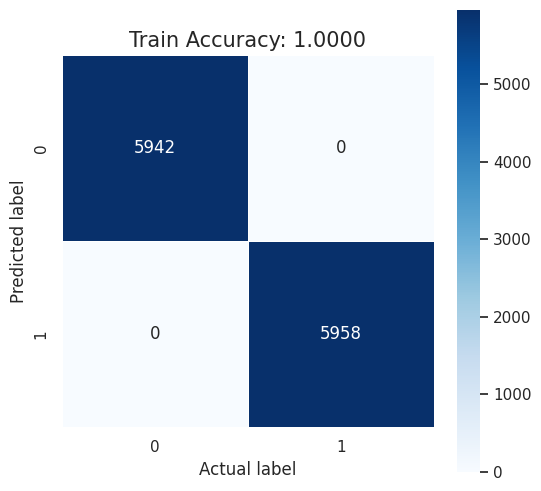

In [ ]:

# Make predictions on the training set
prediction_train = model1.predict(X_train)

# Generate confusion matrix
cm = confusion_matrix(y_train, prediction_train)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
y_pred_train = model1.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



**PROBABILITY THRESHOLD**

Accuracy: 0.9926890756302521
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5942
           1       1.00      0.99      0.99      5958

    accuracy                           0.99     11900
   macro avg       0.99      0.99      0.99     11900
weighted avg       0.99      0.99      0.99     11900



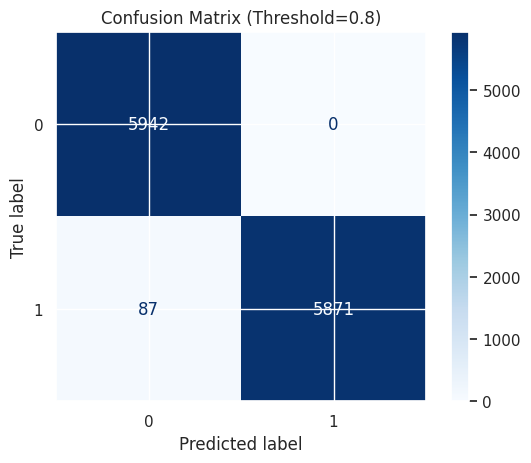

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Obtain predicted probabilities for the training dataset
y_train_probabilities = model1.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.8  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



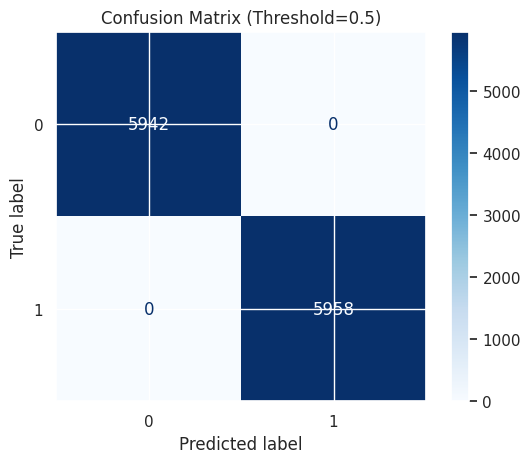

In [ ]:

# Obtain predicted probabilities for the training dataset
y_train_probabilities = model1.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.5  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


**TESTING MODEL PERFORMANCE**

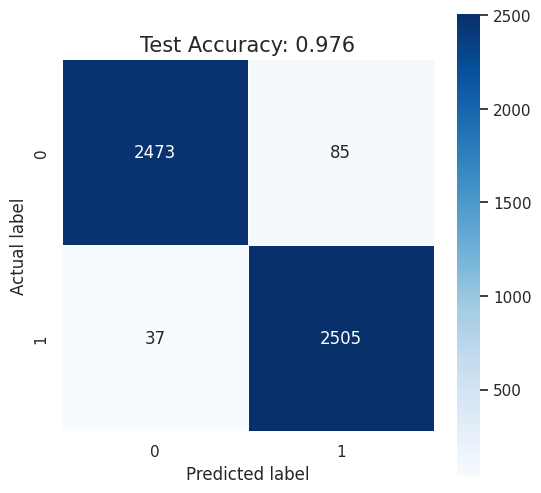

In [ ]:
#Testing Performance
# Make predictions on the testing set

prediction_test = model1.predict(X_test)

# Generate confusion matrix
cm_test = confusion_matrix(y_test, prediction_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_test, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy: {:.3f}'.format(accuracy_score(y_test, prediction_test))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy:{}%".format(100*accuracy))

Accuracy:97.6078431372549%


In [ ]:
y_pred_test = model1.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2558
           1       0.97      0.99      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [ ]:
#XGB CLASSIFIER
model2 = XGBClassifier()

In [ ]:
model2.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model2.predict(X_test)

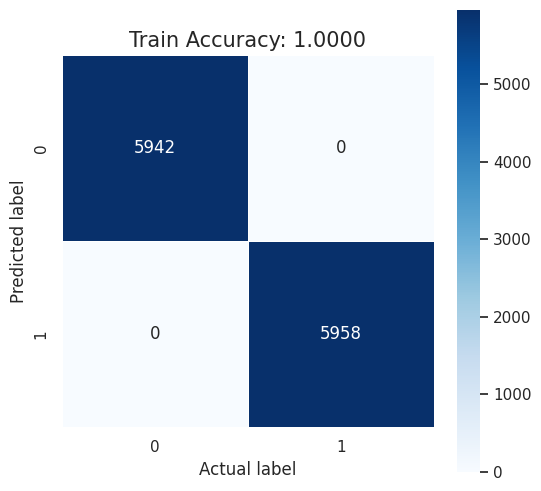

In [ ]:
# Make predictions on the training set
prediction_train = model2.predict(X_train)

# Generate confusion matrix
cm = confusion_matrix(y_train, prediction_train)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
y_pred_train = model2.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



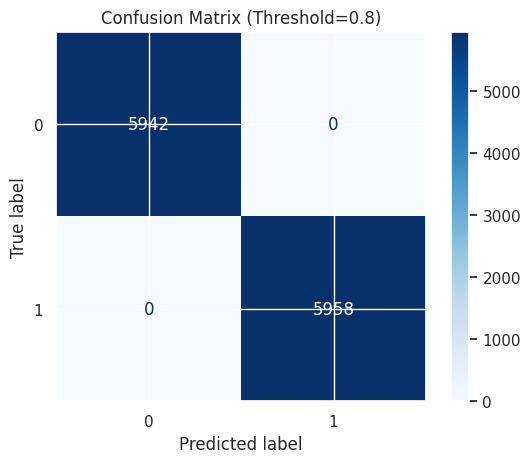

In [ ]:

# Obtain predicted probabilities for the training dataset
y_train_probabilities = model2.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.8  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



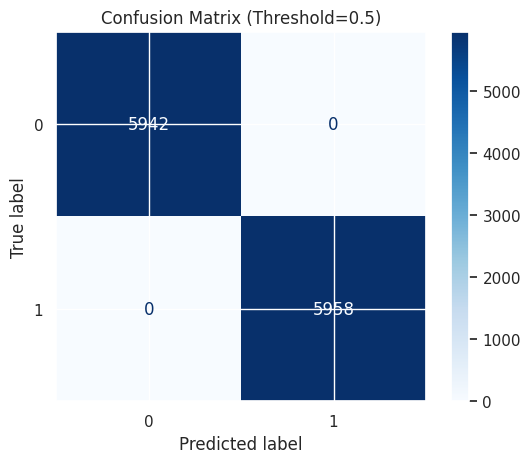

In [ ]:

# Obtain predicted probabilities for the training dataset
y_train_probabilities = model2.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.5  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


**TESTING PERFORMANCE**

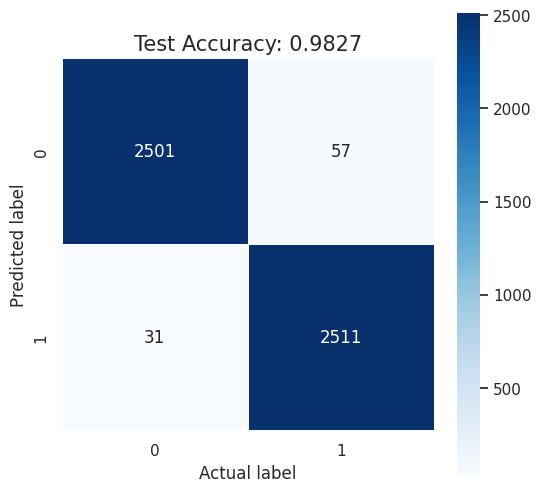

In [ ]:
# Make predictions on the test set
prediction_test = model2.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, prediction_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, prediction_test))
plt.title(all_sample_title, size=15)
plt.show()

In [ ]:
y_pred_test = model2.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2558
           1       0.98      0.99      0.98      2542

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



In [ ]:
#DECISION TREE CLASSIFIER
model3 = DecisionTreeClassifier()

In [ ]:
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# y_pred = model3.predict(X_test)

In [ ]:
accuracy = model3.score(X_train, y_train_threshold)
print("Accuracy:{}%".format(100*accuracy))

Accuracy:100.0%


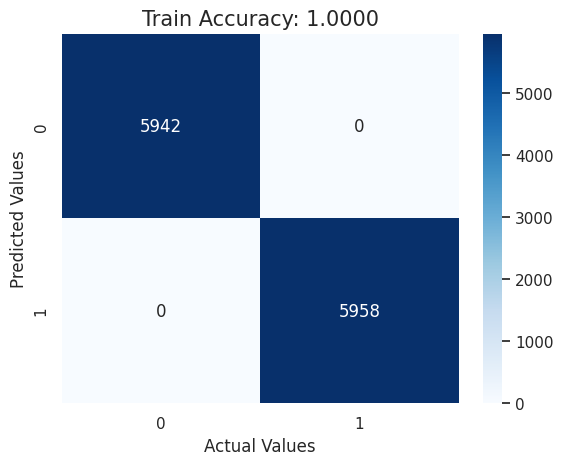

In [ ]:
#Training the model
y_pred = model3.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, prediction_train))
plt.title(all_sample_title, size=15)

plt.show()


In [ ]:
y_pred_train = model3.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



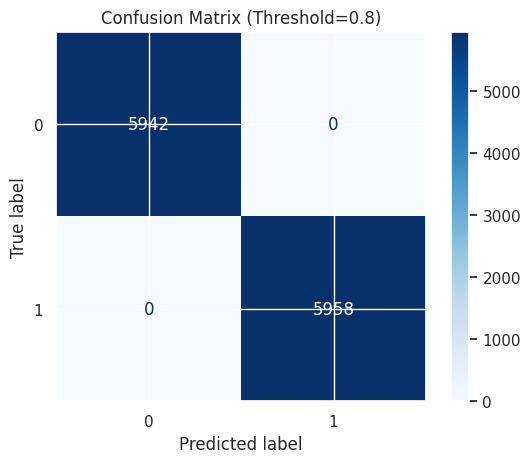

In [ ]:

# Obtain predicted probabilities for the training dataset
y_train_probabilities = model3.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.8  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5942
           1       1.00      1.00      1.00      5958

    accuracy                           1.00     11900
   macro avg       1.00      1.00      1.00     11900
weighted avg       1.00      1.00      1.00     11900



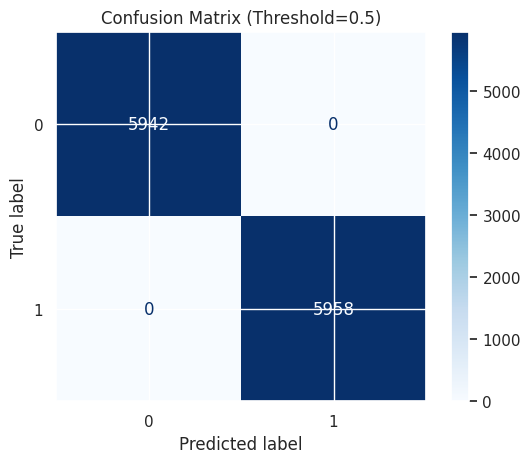

In [ ]:
# Obtain predicted probabilities for the training dataset
y_train_probabilities = model3.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.5  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


**TESTING THE PERFORMANCE**

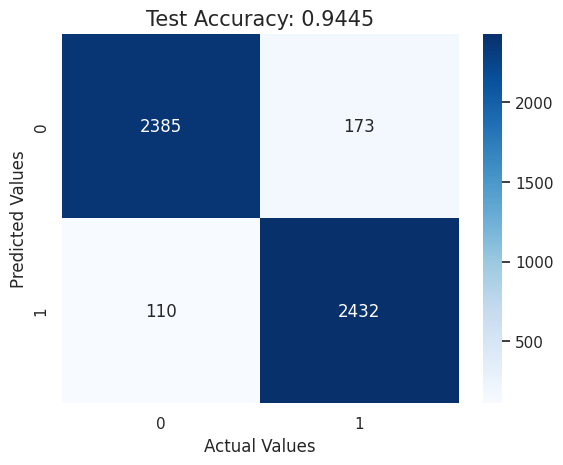

In [ ]:
#Testing the model
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

plt.show()


In [ ]:
y_pred_test = model3.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2558
           1       0.93      0.96      0.95      2542

    accuracy                           0.94      5100
   macro avg       0.94      0.94      0.94      5100
weighted avg       0.94      0.94      0.94      5100



LOGISTIC REGRESSION

In [ ]:
#LOGISTIC REGRESSION
model4 = LogisticRegression(max_iter =2000)

In [ ]:
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model4.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

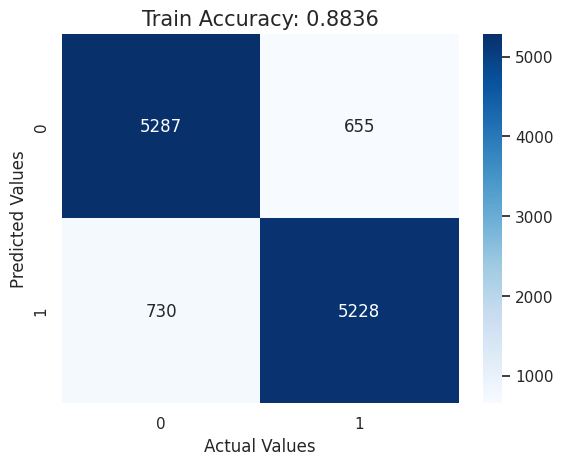

In [ ]:
#Training the model
y_pred = model4.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Train Accuracy: {:.4f}'.format(accuracy_score(y_train, y_pred))
plt.title(all_sample_title, size=15)

plt.show()


In [ ]:
y_pred_train = model4.predict(X_train)
print("Classification Report for Training Data:\n", classification_report(y_train, y_pred_train))

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      5942
           1       0.89      0.88      0.88      5958

    accuracy                           0.88     11900
   macro avg       0.88      0.88      0.88     11900
weighted avg       0.88      0.88      0.88     11900



Accuracy: 0.8372268907563025
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      5942
           1       0.96      0.71      0.81      5958

    accuracy                           0.84     11900
   macro avg       0.86      0.84      0.83     11900
weighted avg       0.86      0.84      0.83     11900



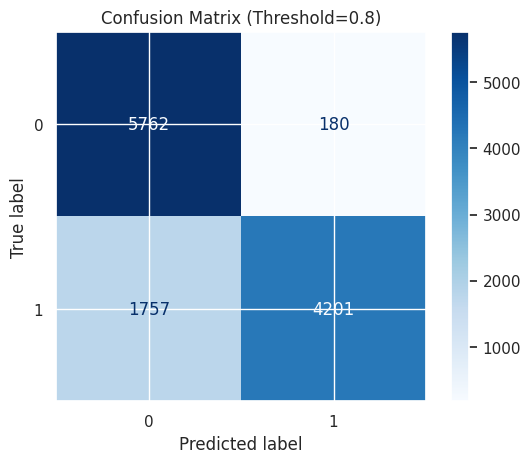

In [ ]:
# Obtain predicted probabilities for the training dataset
y_train_probabilities = model4.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.8  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


Accuracy: 0.8836134453781512
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5942
           1       0.89      0.88      0.88      5958

    accuracy                           0.88     11900
   macro avg       0.88      0.88      0.88     11900
weighted avg       0.88      0.88      0.88     11900



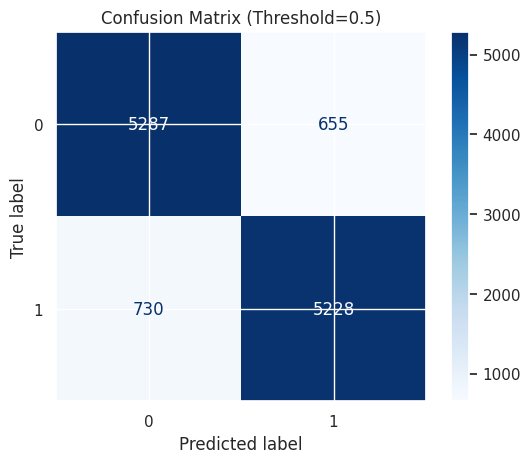

In [ ]:
# Obtain predicted probabilities for the training dataset
y_train_probabilities = model4.predict_proba(X_train)[:, 1]

# Set probability threshold
threshold = 0.5  # Adjust this threshold based on your requirements

# Classify instances based on the threshold
y_train_threshold = (y_train_probabilities > threshold).astype(int)

# Evaluate the model performance on the training dataset
accuracy = accuracy_score(y_train, y_train_threshold)
conf_matrix = confusion_matrix(y_train, y_train_threshold)
classification_report_output = classification_report(y_train, y_train_threshold)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

# Display the confusion matrix using matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.show()


**TESTING THE PERFORMANCE**

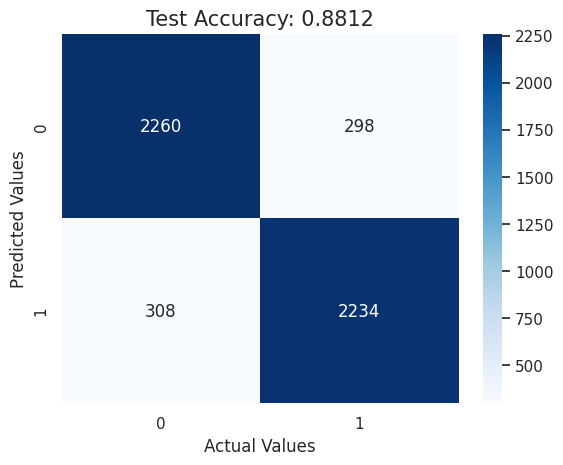

In [ ]:
#Testing the model
y_pred = model4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
all_sample_title = 'Test Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

plt.show()



In [ ]:
y_pred_test = model4.predict(X_test)
print("Classification Report for Test Data:\n", classification_report(y_test, y_pred_test))

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      2558
           1       0.88      0.88      0.88      2542

    accuracy                           0.88      5100
   macro avg       0.88      0.88      0.88      5100
weighted avg       0.88      0.88      0.88      5100



MODEL TRAINING SUMMARY

TRAINING

In [ ]:
from tabulate import tabulate

# Replace these with your actual scores
lr_recall = 0.89
xg_recall = 1.00
dt_recall = 1.00
rf_recall = 1.00

# Placeholder values for accuracy, precision, and f1_score
lr_accuracy = 0.89
xg_accuracy = 1.00
dt_accuracy = 1.00
rf_accuracy = 1.00

lr_precision = 0.88
xg_precision = 1.00
dt_precision = 1.00
rf_precision = 1.00

lr_f1_score = 0.89
xg_f1_score = 1.00
dt_f1_score = 1.00
rf_f1_score = 1.00

# Creating a DataFrame
metrics_df = pd.DataFrame({
    'Model Type': ['Logistic Regression', 'XG Boost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Recall Score': [lr_recall, xg_recall, dt_recall, rf_recall],
    'Accuracy': [lr_accuracy, xg_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, xg_precision, dt_precision, rf_precision],
    'F1 Score': [lr_f1_score, xg_f1_score, dt_f1_score, rf_f1_score]
})

# Sorting the DataFrame by Recall Score in descending order
metrics_df = metrics_df.sort_values(by='Recall Score', ascending=False).reset_index(drop=True)

# Set the title of the table
table_title = 'Training Results'


# Apply styling to the DataFrame
styled_df = metrics_df.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tbody', 'props': [('color', 'darkslategray')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
]).set_properties(**{'background-color': 'lightyellow', 'color': 'black'})


# Print the title
print(f"\n{table_title}\n")

# Display the table using tabulate with centered figures and specified colors
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False,
               numalign='center', stralign='center', colalign=['center'] * 5,))




Training Results

╒══════════════════════════╤════════════════╤════════════╤═════════════╤════════════╕
│        Model Type        │  Recall Score  │  Accuracy  │  Precision  │  F1 Score  │
╞══════════════════════════╪════════════════╪════════════╪═════════════╪════════════╡
│   XG Boost Classifier    │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Decision Tree Classifier │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Random Forest Classifier │       1        │     1      │      1      │     1      │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│   Logistic Regression    │      0.89      │    0.89    │    0.88     │    0.89    │
╘══════════════════════════╧════════════════╧════════════╧═════════════╧════════════╛


TESTING

In [ ]:
# Replace these with your actual scores
lr_recall = 0.88
xg_recall = 0.99
dt_recall = 0.95
rf_recall = 0.98

# Placeholder values for accuracy, precision, and f1_score
lr_accuracy = 0.88
xg_accuracy = 0.99
dt_accuracy = 0.95
rf_accuracy = 0.98

lr_precision = 0.88
xg_precision = 0.99
dt_precision = 0.95
rf_precision = 0.98

lr_f1_score = 0.88
xg_f1_score = 0.99
dt_f1_score = 0.95
rf_f1_score = 0.98

# Creating a DataFrame
metrics_df = pd.DataFrame({
    'Model Type': ['Logistic Regression', 'XG Boost Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Recall Score': [lr_recall, xg_recall, dt_recall, rf_recall],
    'Accuracy': [lr_accuracy, xg_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, xg_precision, dt_precision, rf_precision],
    'F1 Score': [lr_f1_score, xg_f1_score, dt_f1_score, rf_f1_score]
})

# Sorting the DataFrame by Recall Score in descending order
metrics_df = metrics_df.sort_values(by='Recall Score', ascending=False).reset_index(drop=True)

# Set the title of the table
table_title = 'Testing Results'


# Apply styling to the DataFrame
styled_df = metrics_df.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tbody', 'props': [('color', 'darkslategray')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]}
]).set_properties(**{'background-color': 'lightyellow', 'color': 'black'})


# Print the title
print(f"\n{table_title}\n")

# Display the table using tabulate with centered figures and specified colors
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False,
               numalign='center', stralign='center', colalign=['center'] * 5,))



Testing Results

╒══════════════════════════╤════════════════╤════════════╤═════════════╤════════════╕
│        Model Type        │  Recall Score  │  Accuracy  │  Precision  │  F1 Score  │
╞══════════════════════════╪════════════════╪════════════╪═════════════╪════════════╡
│   XG Boost Classifier    │      0.99      │    0.99    │    0.99     │    0.99    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Random Forest Classifier │      0.98      │    0.98    │    0.98     │    0.98    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│ Decision Tree Classifier │      0.95      │    0.95    │    0.95     │    0.95    │
├──────────────────────────┼────────────────┼────────────┼─────────────┼────────────┤
│   Logistic Regression    │      0.88      │    0.88    │    0.88     │    0.88    │
╘══════════════════════════╧════════════════╧════════════╧═════════════╧════════════╛


**HYPERPARAMETER TUNING**

In [ ]:
# #Random Forest Classifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Assuming you have X_train and y_train defined

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the RandomizedSearchCV object
# rf_model = RandomForestClassifier()
# random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best Hyperparameters:", random_search.best_params_)


In [ ]:
# #Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid for DecisionTreeClassifier
# param_grid_dt = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']  # Set max_features explicitly
# }

# # Create DecisionTreeClassifier instance
# dt_model = DecisionTreeClassifier(random_state=123)

# # Create GridSearchCV object
# grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search_dt.fit(X_train, y_train)

# # Print the best parameters
# print("Best hyperparameters for DecisionTreeClassifier:", grid_search_dt.best_params_)


In [ ]:
# #Hyperparameter tuning for XGBClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Define the hyperparameter grid for XGBoost
# param_grid_xgb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2, 3],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
# }

# # Create XGBClassifier instance
# xgb_model = XGBClassifier(random_state=123)

# # Create RandomizedSearchCV object
# random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb,
#                                         n_iter=10, cv=5, scoring='accuracy', random_state=123)

# # Fit the random search to the data
# random_search_xgb.fit(X_train, y_train)

# # Print the best parameters
# print("Best hyperparameters for XGBoost:", random_search_xgb.best_params_)



In [ ]:
# Hyperparameter tuning for Logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters grid for Logistic Regression
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# # Create a Logistic Regression object
# lr = LogisticRegression()

# # Create GridSearchCV object
# grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Score:", best_score)


In [ ]:
# After hyperparameter tuning for RandomForestClassifier
# best_rf_model = random_search.best_estimator_
# y_pred_rf = best_rf_model.predict(X_train)

# print("Classification Report for Training Split RandomForestClassifier:\n", classification_report(y_train, y_pred_rf))

In [ ]:
# After hyperparameter tuning for RandomForestClassifier
# best_rf_model = random_search.best_estimator_
# y_pred_rf = best_rf_model.predict(X_test)

# print("Classification Report for Testing Split RandomForestClassifier:\n", classification_report(y_test, y_pred_rf))


In [ ]:
# After hyperparameter tuning for DecisionTreeClassifier
# best_dt_model = grid_search_dt.best_estimator_
# y_pred_dt = best_dt_model.predict(X_train)
# print("Classification Report for Training Split DecisionTreeClassifier:\n", classification_report(y_train, y_pred_dt))

In [ ]:
# After hyperparameter tuning for DecisionTreeClassifier
# best_dt_model = grid_search_dt.best_estimator_
# y_pred_dt = best_dt_model.predict(X_test)
# print("Classification Report for Test Split DecisionTreeClassifier:\n", classification_report(y_test, y_pred_dt))

In [ ]:
# After hyperparameter tuning for XGBClassifier
# best_xgb_model = random_search_xgb.best_estimator_
# y_pred_xgb = best_xgb_model.predict(X_train)
# print("Classification Report for XGBClassifier:\n", classification_report(y_train, y_pred_xgb))

In [ ]:
# After hyperparameter tuning for XGBClassifier
# best_xgb_model = random_search_xgb.best_estimator_
# y_pred_xgb = best_xgb_model.predict(X_test)
# print("Classification Report for XGBClassifier:\n", classification_report(y_test, y_pred_xgb))

In [ ]:
# After hyperparameter tuning for Logistic Regression
# best_lr_model = grid_search.best_estimator_
# y_pred_lr = best_lr_model.predict(X_train)
# print("Classification Report for Training Split Logistic Regression:\n", classification_report(y_train, y_pred_lr))

In [ ]:
# After hyperparameter tuning for Logistic Regression
# best_lr_model = grid_search.best_estimator_
# y_pred_lr = best_lr_model.predict(X_test)
# print("Classification Report for Testing Split Logistic Regression:\n", classification_report(y_test, y_pred_lr))

CROSS VALIDATION

In [ ]:
#Logistic Regression
from sklearn.model_selection import cross_val_score, KFold

#Recall the model
model4 = LogisticRegression()

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
scores = cross_val_score(model4, X, y, cv=num_folds, scoring='accuracy')

#Evaluate the result
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross-validation scores: [0.60529412 0.80794118 0.87117647 0.88764706 0.58823529]
Mean accuracy: 0.7520588235294119
Standard deviation of accuracy: 0.1296719309973493


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Recall the model
model3 = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model3, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.77352941 0.92911765 0.97470588 0.97794118 0.635     ]
Mean accuracy: 0.8580588235294118
Standard deviation of accuracy: 0.1341105003255817


In [ ]:
# Recall the model
model2 = XGBClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.86823529 0.97088235 0.99147059 0.99705882 0.64470588]
Mean accuracy: 0.8944705882352941
Standard deviation of accuracy: 0.1332987642614635


In [ ]:
# Create a Random Forest Classifier instance
model1 = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model1, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

Cross-validation scores: [0.97394958 0.97226891 0.97605042 0.97436975 0.97184874]
Mean accuracy: 0.9736974789915965
Standard deviation of accuracy: 0.001517266393719977


VALIDATION OF PERFORMANCE

In [ ]:
model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Validation of Performance on RandomForestClassifier
#Predictions on the test set
y_pred_test = model1.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

Accuracy for Test Data: 0.9778


In [ ]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Validation of Performance on XGBClassifier
# Predictions on the test set
y_pred_test = model2.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

Accuracy for Test Data: 0.9827


In [ ]:
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Validation of Performance on DecisionTreeClassifier
# Predictions on the test set
y_pred_test = model3.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

Accuracy for Test Data: 0.9425


In [ ]:
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#Validation of Performance on LogisticRegressionClassifier
# Predictions on the test set
y_pred_test = model4.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy for Test Data: {accuracy:.4f}")

Accuracy for Test Data: 0.8088


COMPARISON OF MODELS

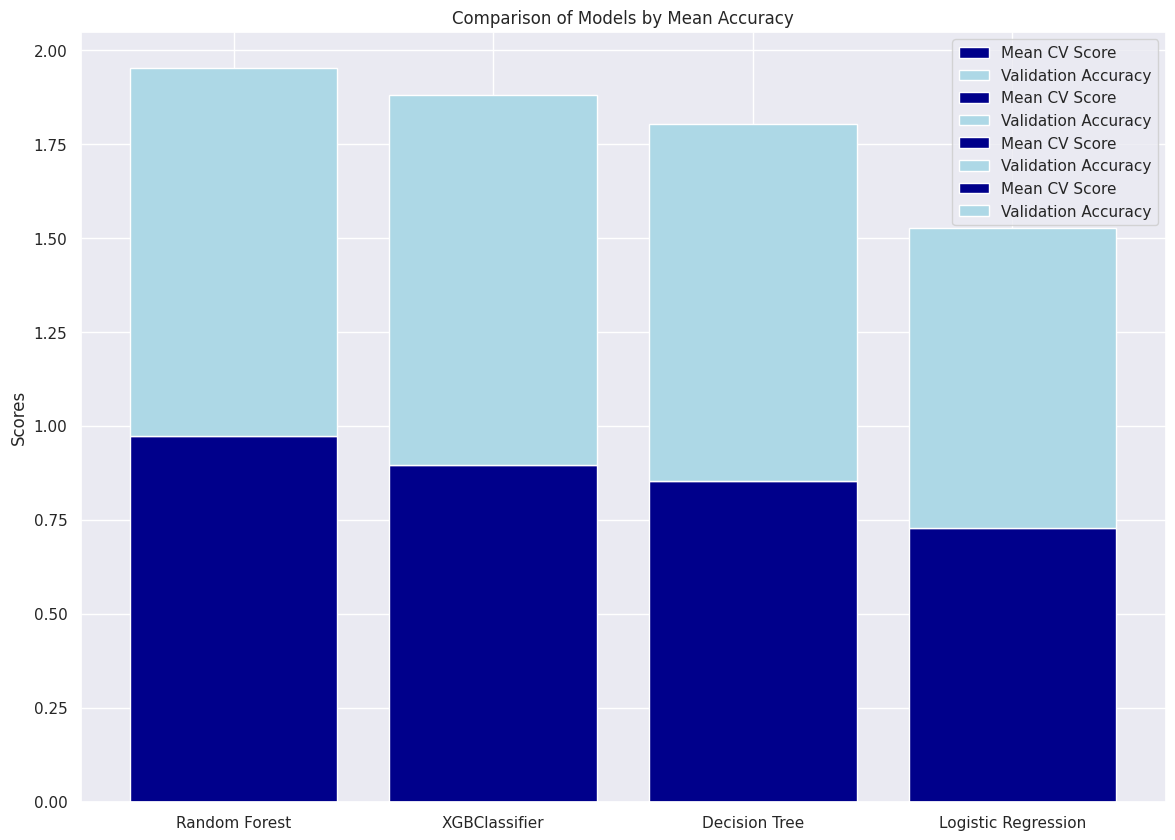

In [ ]:

# Model names
models = ['Random Forest', 'XGBClassifier', 'Decision Tree', 'Logistic Regression']

# Cross-validation scores
cross_val_scores = np.array([[0.9714, 0.9735, 0.9765, 0.9769, 0.9731],
                             [0.8759, 0.9718, 0.9953, 0.9974, 0.6391],
                             [0.7615, 0.9244, 0.9735, 0.9759, 0.6362],
                             [0.5641, 0.7841, 0.8491, 0.8974, 0.5441]])

# Calculate mean of cross-validation scores
mean_cross_val_scores = np.mean(cross_val_scores, axis=1)

# Validation accuracy
validation_accuracy = np.array([0.9769, 0.9851, 0.9482, 0.7978])

# Colors for the stacked columns
colors = ['darkblue', 'lightblue']

# Create a stacked column chart
fig, ax = plt.subplots(figsize=(14, 10))

for i, model in enumerate(models):
    ax.bar(model, mean_cross_val_scores[i], color=colors[0], label='Mean CV Score')
    ax.bar(model, validation_accuracy[i], bottom=mean_cross_val_scores[i], color=colors[1], label='Validation Accuracy')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Models by Mean Accuracy')
ax.legend()

plt.show()



In [ ]:
from tabulate import tabulate

# Model names
models = ['Random Forest', 'XGBClassifier', 'Decision Tree', 'Logistic Regression']

# Cross-validation scores
cross_val_scores = [[0.9714, 0.9735, 0.9765, 0.9769, 0.9731],
                    [0.8759, 0.9718, 0.9953, 0.9974, 0.6391],
                    [0.7615, 0.9244, 0.9735, 0.9759, 0.6362],
                    [0.5641, 0.7841, 0.8491, 0.8974, 0.5441]]

# Convert cross-validation scores to percentage
cross_val_percentage = [[score * 100 for score in scores] for scores in cross_val_scores]

# Calculate mean of cross-validation scores
mean_cross_val_scores = [sum(scores) / len(scores) * 100 for scores in cross_val_scores]

# Validation accuracy
validation_accuracy = [0.9769, 0.9851, 0.9482, 0.7978]

# Convert validation accuracy to percentage
validation_accuracy_percentage = [accuracy * 100 for accuracy in validation_accuracy]

# Create data for tabulate
data = []
for model, mean_score, val_accuracy in zip(models, mean_cross_val_scores, validation_accuracy_percentage):
    data.append([model, *['{:.2f}%'.format(score) for score in [mean_score, val_accuracy]]])

# Set the header
headers = ['Model', 'Cross-Validation Accuracy', 'Validation Accuracy']

# Print the table
print(tabulate(data, headers=headers, tablefmt='grid'))




+---------------------+-----------------------------+-----------------------+
| Model               | Cross-Validation Accuracy   | Validation Accuracy   |
+=====================+=============================+=======================+
| Random Forest       | 97.43%                      | 97.69%                |
+---------------------+-----------------------------+-----------------------+
| XGBClassifier       | 89.59%                      | 98.51%                |
+---------------------+-----------------------------+-----------------------+
| Decision Tree       | 85.43%                      | 94.82%                |
+---------------------+-----------------------------+-----------------------+
| Logistic Regression | 72.78%                      | 79.78%                |
+---------------------+-----------------------------+-----------------------+


In [ ]:
feature_names = X_train.columns

In [ ]:
#features_to_exclude = ['Single', 'Married', 'Divorced', 'Gold', 'Blue', 'Silver']

In [ ]:
feature_importances = model1.feature_importances_

In [ ]:
feature_names = X_train.columns.tolist()

In [ ]:
# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]


In [ ]:
#feature_importance_df = pd.DataFrame({'Feature': feature_importance, 'Importance': feature_importance[:len(feature_importance)]})

In [ ]:
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)


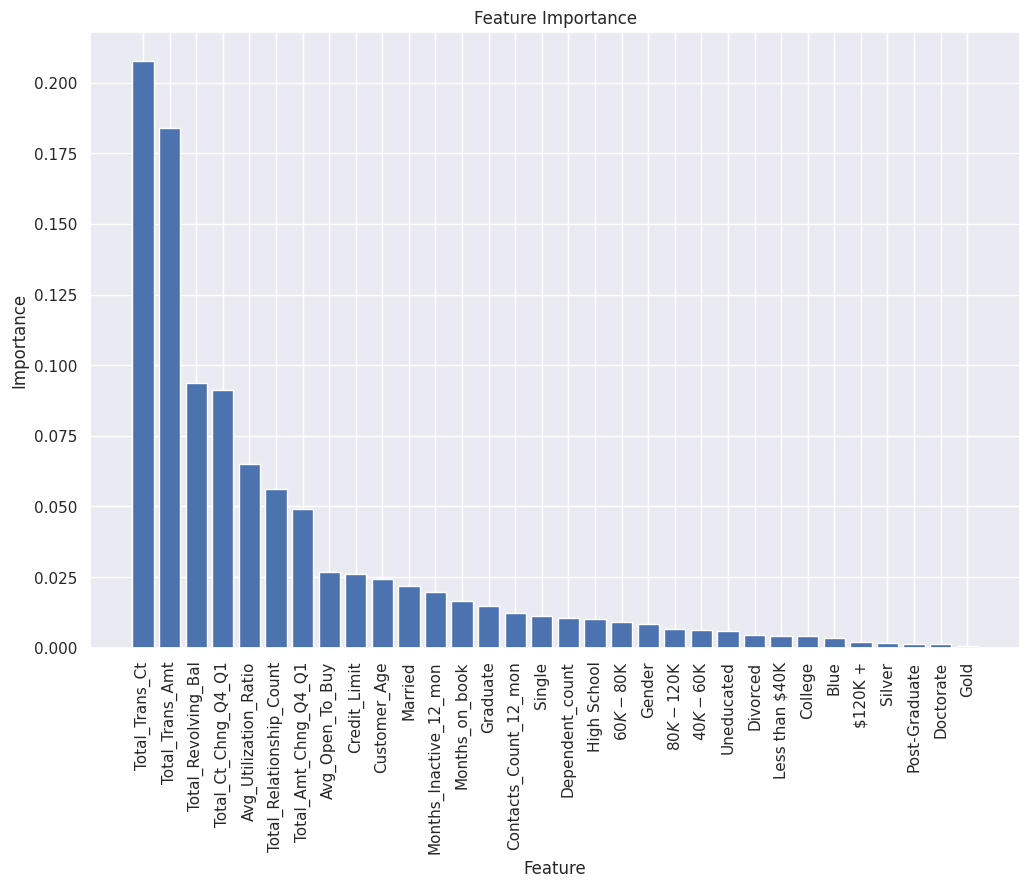

In [ ]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(len(indices)), feature_importances[indices], align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

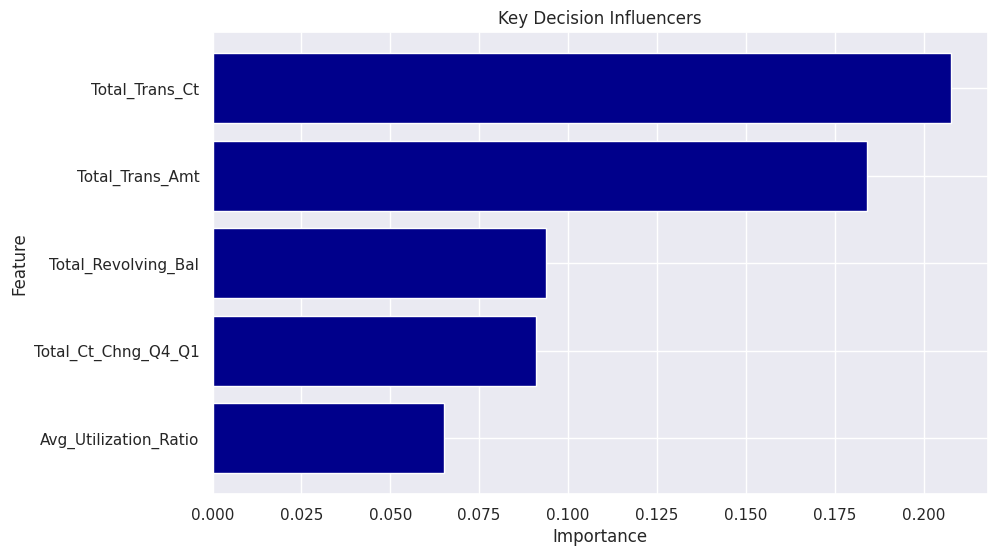

In [ ]:
# Select the top 5 features
top_features_indices = indices[:5]
top_feature_importances = feature_importances[top_features_indices]
top_feature_names = [feature_names[i] for i in top_features_indices]

# Plotting the horizontal bar chart for top 5 features
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_indices)), top_feature_importances, color='Darkblue')
plt.yticks(range(len(top_features_indices)), top_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Key Decision Influencers')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

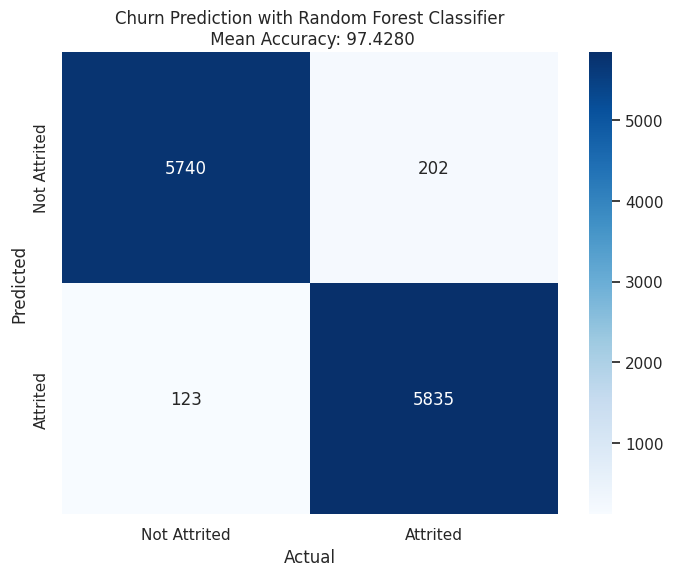

In [ ]:
from sklearn.model_selection import cross_val_predict

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Use cross-validation to predict labels for the training data
predicted_labels = cross_val_predict(rf_classifier, X_train, y_train, cv=5)

# Define class labels
class_labels = ["Not Attrited", "Attrited"]

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_train, predicted_labels)

# Define class labels
class_labels = ["Not Attrited", "Attrited"]

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_train, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Churn Prediction with Random Forest Classifier\n Mean Accuracy: {:.4f}'.format(97.4280))
plt.show()

AREA UNDER CURVE (AUC)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



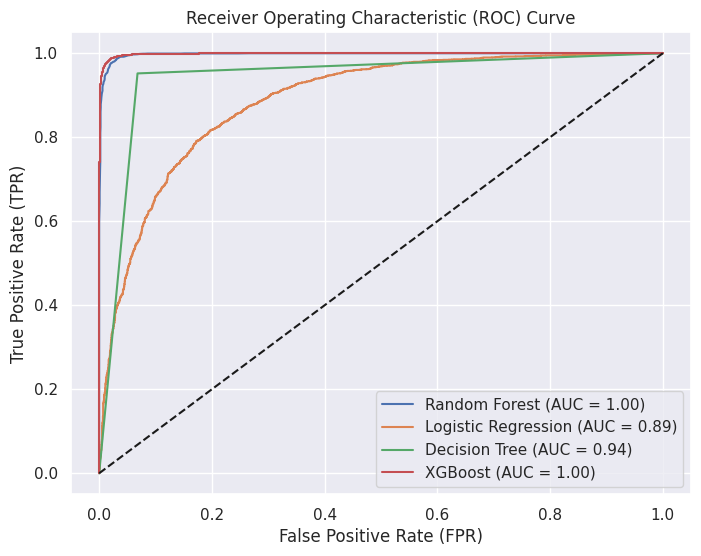

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
# Train your models and generate predicted probabilities for each
models = {
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()  # Replace XGBoost with your actual XGBClassifier model
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

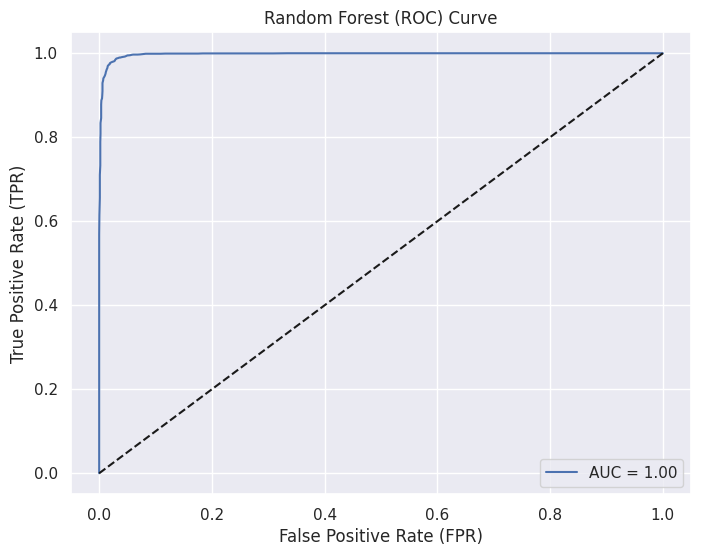

In [ ]:

# Assuming X_train, X_test, y_train, y_test are your feature matrices and labels
# Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Generate predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model1, 'model1.pkl')


['model1.pkl']

In [ ]:
#from google.colab import files

# Upload the model file to Colab
#uploaded = files.upload()


In [ ]:
#!mv model1\.pkl /content/Dockerfile


In [ ]:
# Load the RandomForestClassifier model
model = joblib.load('model1.pkl')


In [ ]:
#from colabcode import Colabcode
#from fastapi import FastAPI

In [ ]:
#cc = Colabcode(port=12000, code = False)

In [ ]:
#app = FastAPI()

#@app.get("/")
#async def read_root():
  #return ("Hello": "World")

In [ ]:
#cc.run_app(app*app)

In [ ]:
input_data = pd.DataFrame(
    {
        'Attr1': ['Total Transaction Count in the Last 12 months'],
        'Attr2': ['Total Transaction Amount in the Last 12 months'],
        'Attr3': ['Quarterly change in Transaction Count'],
        'Attr4': ['Total Revolving Balance'],
        'Attr5': ['Average Card Utilization Ratio']
    }
)

In [ ]:
import os

# Print current working directory
print("Current Directory:", os.getcwd())

# List files in the current directory
print("Files in Current Directory:", os.listdir())




Current Directory: /content
Files in Current Directory: ['.config', 'FirstBankCreditCardCustomersChurners.csv', 'model1.pkl', 'streamlit_app.py', 'sample_data']


In [ ]:
%%writefile streamlit_app.py


Overwriting streamlit_app.py


In [ ]:
# streamlit_app.py

#import streamlit as st

#def main():
    #st.title('Hello Streamlit!')
    #st.write('This is a simple Streamlit app.')

#if __name__ == '__main__':
    #main()


In [ ]:
#!streamlit run streamlit_app.py


In [ ]:
# streamlit_app.py
import streamlit as st

#Function to make predictions
def predict(attr1, attr2, attr3, attr4, attr5):
    input_data = pd.DataFrame(
        {
        'Attr1': [attr1],
        'Attr2': [attr2],
        'Attr3': [attr3],
        'Attr4': [attr4],
        'Attr5': [attr5]
        }
    )

    prediction = model1.predict(input_data)
    return prediction[0]

# Streamlit app
def main():
    st.title('RandomForestClassifier Streamlit App')

    # User input for attributes
    attr1 = st.slider('Attr1', min_value=0, max_value=100, value=50)
    attr2 = st.slider('Attr2', min_value=0, max_value=100, value=50)
    attr3 = st.slider('Attr3', min_value=0, max_value=100, value=50)
    attr4 = st.slider('Attr4', min_value=0, max_value=100, value=50)
    attr5 = st.slider('Attr5', min_value=0, max_value=100, value=50)

    if st.button('Predict'):
        result = predict(attr1, attr2, attr3, attr4, attr5)
        st.write(f'The prediction is: {result}')

    if __name__ == '__main__':
      main()



In [309]:
!streamlit run streamlit_app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.71.65.212:8501

  Stopping...
  Stopping...


In [ ]:
#from fastapi import FastAPI
#from pydantic import BaseModel

In [ ]:
# Load your trained model
model = joblib.load('model1.pkl')

In [ ]:
# Define your FastAPI app
app = FastAPI()


In [ ]:
#!pip install uvicorn nest_asyncio


In [ ]:
#import nest_asyncio
#  nimport uvicorn

In [ ]:
# Define input data schema
class InputData(BaseModel):
    attr1: str
    attr2: str
    attr3: str
    attr4: str
    attr5: str

@app.post("/predict")
async def predict(data: InputData):
    # Prepare input data for prediction
    input_data = [[data.attr1, data.attr2, data.attr3, data.attr4, data.attr5]]

    # Make prediction
    prediction = model.predict(input_data)

    # Return prediction
    return {"prediction": prediction[0]}
{
  "attr1": "Total Transaction Count(Last 12 Months)",
  "attr2": "Total Transaction Amount(Last 12 Months)",
  "attr3": "Quartely Change in Transaction Count",
  "attr4": "Total Revolving Balance",
  "attr5": "Average Card Utilization Ratio"
}

# Allow nested asyncio event loops (required for running in Colab)
nest_asyncio.apply()

# Run the FastAPI app with Uvicorn
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)
